# Evil Geniuses - Data Scientist Intern Assessment 

## Objectives:
* Develop a model to predict a Starcraft player's rank
* Communicate findings with non-technical stakeholders
* Suggestions for future data collection based on EDA and model results

## Table of Contents:
* [1. Extract, Transform and Load Data (ETL)](#first-bullet)
* [2. Exploratory Data Analysis (EDA)](#second-bullet)
* [3. Model Evaluation and Refinement](#third-bullet)
* [4. Predictions and Model Accuracy](#forth-bullet)
* [5. Communication with Non-technical Stakeholders](#fifth-bullet)
* [6. Hypothetical: Suggestions for Data Collection](#sixth-bullet)

## 1. Extract, Transform and Load Data (ETL) <a class="anchor" id="first-bullet"></a>


### 1.1 Load necessary packages and check versions

In [248]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as mpl
print('matplotlib: {}'.format(mpl.__version__))
# matplotlib
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]
scipy: 1.10.0
numpy: 1.24.1
matplotlib: 3.6.3
seaborn: 0.12.2
pandas: 1.5.3
sklearn: 1.2.2


In [249]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix

## Data visualization: use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

## Modelling
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 1.2 Load the dataset, and wrangle the data

In [250]:
# Load dataset 
dataset = pd.read_csv("./data/starcraft_player_data.csv")
# head
dataset.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


#### 1.2.1 Basic info of the dataset

In [251]:
# summarize the data
# shape
print("Data Shape:", dataset.shape)

Data Shape: (3395, 20)


In [252]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

#### 1.2.2 Dealing with missing data

In [253]:
# check how many missing values there are in the dataset
rows_with_missing_values = dataset.loc[(dataset == '?').any(axis=1)]
print(rows_with_missing_values.shape)
rows_with_missing_values.tail()

(57, 20)


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


In [254]:
# check how many missing values with LeagueIndex equals to 8
rows_with_missing_values[rows_with_missing_values["LeagueIndex"] == 8].shape

(55, 20)

It can be found that most of the data with missing values have a really high rank (8). Droping the missing values would result in the complete removel of data with LeagueIndex of 8. It is crucial to consider alternative methods of handling missing values rather than simply dropping them.

Here, I adopt the mean imputation to fill up the missing values with corresponding mean in each column. 

There are also other methods, such as seperate analysis (subsetting data and building different model) and advanced imputation techniques(e.g. K-nearest nerighbors imputation). We can definitely try different methods if time permitted.

In [255]:
# replace all ? into np.nan
dataset.replace("?", np.nan, inplace = True)

for i in ["Age", "HoursPerWeek", "TotalHours"]:
    avg = dataset[i].astype("float").mean(axis=0).__ceil__() # notice that all the value of Age, HoursPerWeek and TotalHours are Integers
    dataset[i].replace(np.nan, avg, inplace=True)

In [256]:
dataset.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,22,16,961,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,22,16,961,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,22,16,961,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,22,16,961,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,22,16,961,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


#### 1.2.3 Data Formatting

In [257]:
# check the data type again
dataset.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [258]:
# convert the object-typed variable into float
dataset[["Age", "HoursPerWeek", "TotalHours"]] = dataset[["Age", "HoursPerWeek", "TotalHours"]].astype("float")

In [259]:
# data types recheck
dataset.dtypes

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

After wrangling the original data, we get a new dataset with no missing values and correct data types (dataset_cd).

#### 1.2.4 Dealing with outliers

In [260]:
# Basic desription of the data (mean, median ...)
dataset.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.653608,15.912224,960.431517,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172356,11.863815,17172.094828,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


As we can see from the above summarized statistics, there exits unreasonable data:
* TotalHours == 1000000, which equals to over 114 years (1000000/24/365 = 114.16)

In [261]:
# we drop the data with extreme value in TotalHours
dataset = dataset[dataset["TotalHours"] != 1000000]
dataset.shape

(3394, 20)

## 2. Exploratory Data Analysis (EDA) <a class="anchor" id="second-bullet"></a>

In [262]:
# Basic desription of the data (mean, median ...)
dataset.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.00000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,4804.913671,4.183854,21.654685,15.909841,666.076900,116.998515,0.004293,0.000373,4.364467,0.000098,0.000387,0.003462,40.36517,63.747538,5.272818,22.129641,0.001032,6.534178,0.000059,0.000142
std,2720.339558,1.517486,4.172500,11.864750,849.999972,51.876225,0.005275,0.000225,2.360656,0.000166,0.000377,0.000992,17.15481,19.235862,1.495023,7.431879,0.000519,1.857948,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.66670,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.250000,3.000000,19.000000,8.000000,300.000000,79.863600,0.001258,0.000204,3.000000,0.000000,0.000140,0.002753,28.96595,50.454375,4.272575,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4871.000000,4.000000,21.000000,12.000000,500.000000,108.006300,0.002498,0.000353,4.000000,0.000040,0.000281,0.003395,36.72745,60.935350,5.094950,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7109.250000,5.000000,24.000000,20.000000,800.000000,142.783650,0.005128,0.000499,6.000000,0.000119,0.000514,0.004026,48.29055,73.689800,6.033750,27.000000,0.001258,8.000000,0.000086,0.000182
max,10095.000000,8.000000,44.000000,168.000000,25000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.14290,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### 2.1 Inspect class (ranks) distribution

In this problem, what we interested in is the LeagueIndex (y, dependent variable), which represents player's rank. So, let's use **groupby()** method and **bar plot** to investigate the distribution of it.

In [263]:
# leagueIndex distribution
print(dataset.groupby('LeagueIndex').size())

LeagueIndex
1    167
2    347
3    553
4    811
5    805
6    621
7     35
8     55
dtype: int64


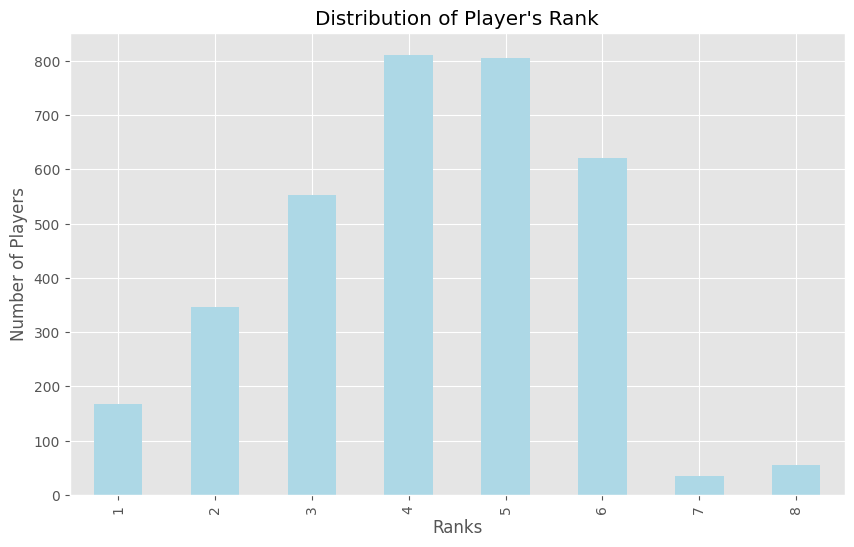

In [264]:
# distribution of ranks
dataset.groupby('LeagueIndex').size().plot(kind='bar', figsize=(10, 6), color= "lightblue")

plt.xlabel('Ranks')
plt.ylabel('Number of Players')
plt.title("Distribution of Player's Rank")

plt.show()

We can see LeagueIndex (ranks) is not evenly distributed across the dataset, with a large majority of samples in classes 4, 5, and 6, and relatively fewer samples in classes 1,2, 3, 7, and 8. 

This distribution can potentially affect the model's performance and accuracy, as the model may be biased towards predicting the marjority classes. And the model may present challenges in accurately predicting the higher ranks, as there is limited data available for training the model in rare classes such as 7 and 8.

The distribution suggests that there is a need to address the *class imbalance*, *choose appropriate evaluation metrics*, *handle rare classes effectively* and *consider mocels suitable for ordinal data* to ensure accurate predictions and meaningful insights. 

### 2.2 Data Visulization

* Univariate plots to better understand each variable
* Multivariate plots to better understand the relationships between variables

#### 2.2.1 Univariate

In [265]:
# We select the independent variables (Xs) out of the dataset for analysis
dataset_Xs = dataset.iloc[:, 2:]
dataset_Xs.head()
print(dataset_Xs.shape)

(3394, 18)


Box plots give us a much clear idea of the distrubution of the input attributes:

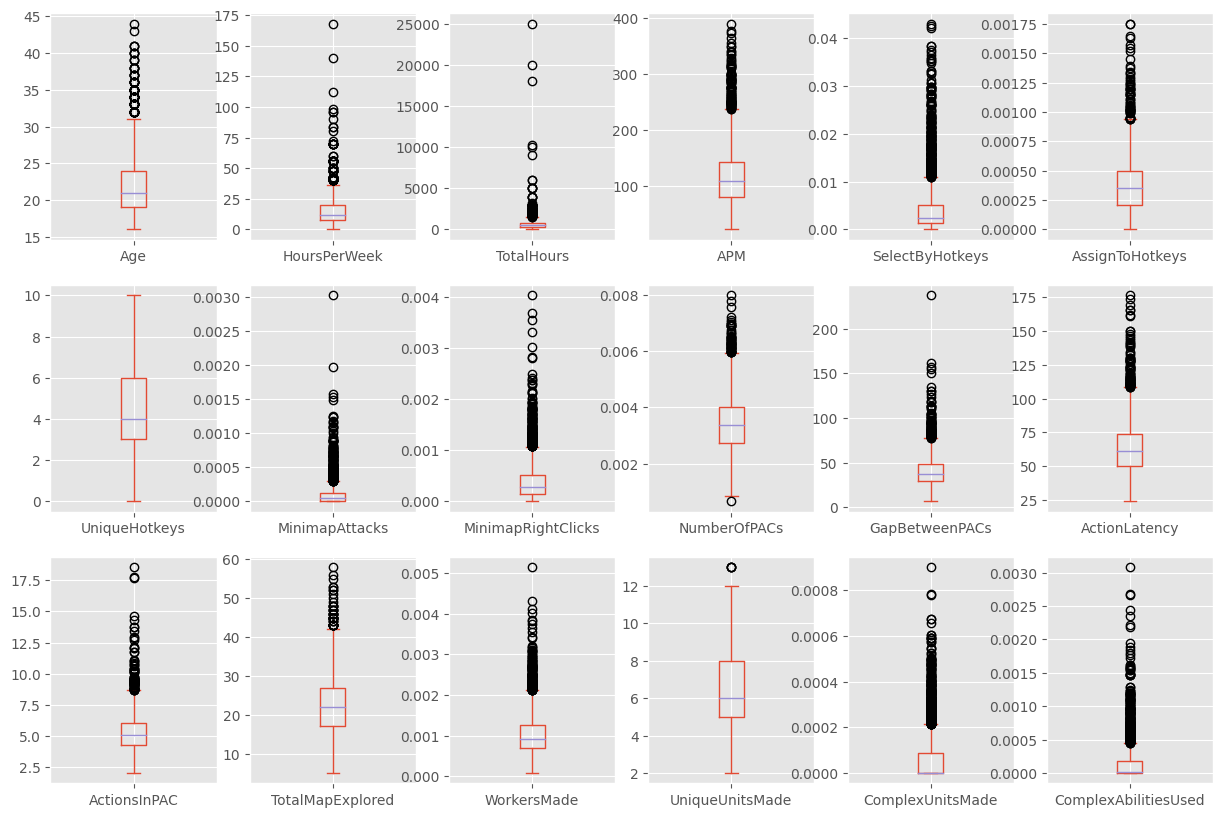

In [266]:
# box plots
dataset_Xs.plot(kind="box", subplots=True, layout=(3,6), figsize=(15,10), sharex=False, sharey=False)
plt.show()

From the box plots, we can see there are lots of outliers from input variables. These might influence our model performance. We might need to manipulate them later for the better model performance.



Also, use the histogram of each input variable to get an idea of the distribution.

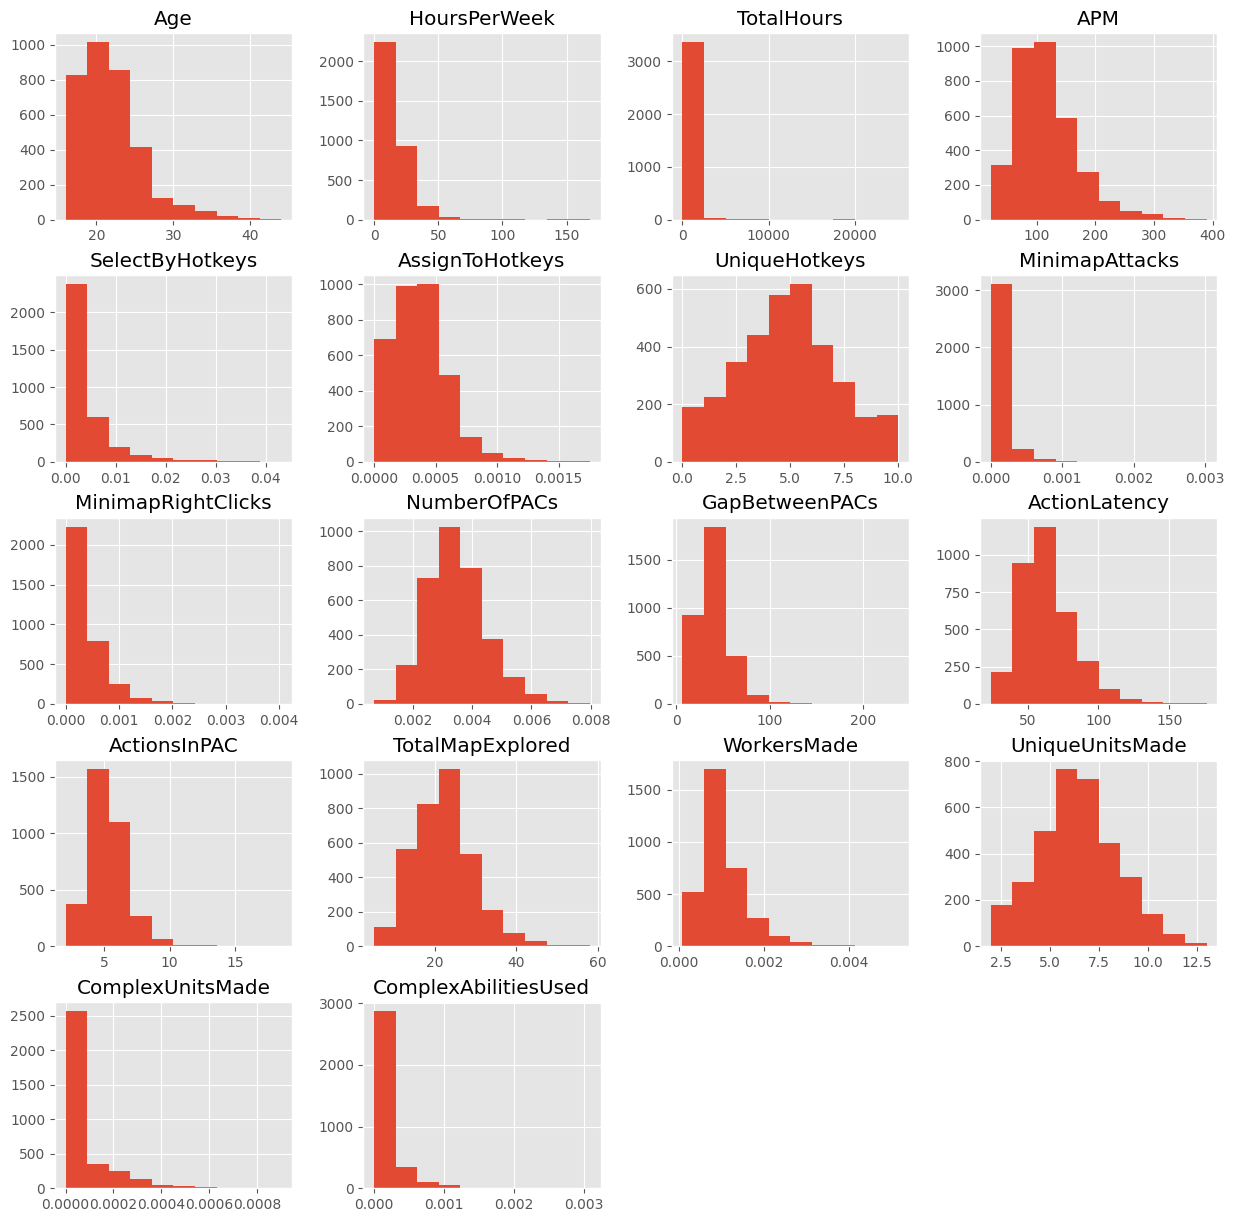

In [267]:
dataset_Xs.hist(figsize=(15,15))
plt.show()

It looks like some input variables (UniqueHotkeys, UniqueUnitsMade, NumberOfPACs...) follow a normal distribution. This is useful to note as we can use algorithms that can exploit this assumption.

#### 2.2.2 Multivariate plots

Here, we want to explore the interaction between variables.

We firstly look at heatmap of all pairs of attributes to spot structured relationships between input variables and output variable (LeagueIndex).

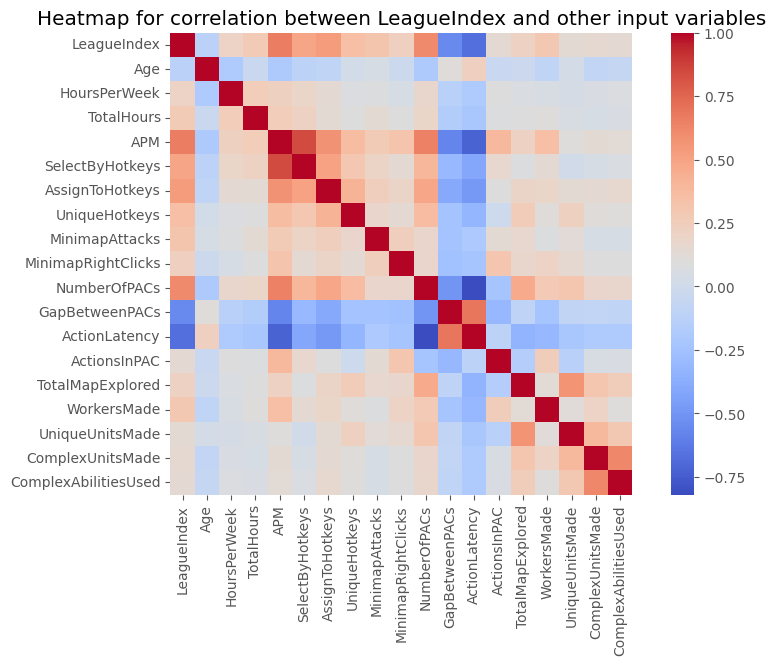

In [268]:
# Compute correlation matrix
corr_matrix = dataset.iloc[:, 1:].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)

# Set plot title and axis labels
plt.title('Heatmap for correlation between LeagueIndex and other input variables')

# Show the plot
plt.show()

From the eyeball obsevation from this heatmap, we can tell:
- Variables with little or no relationship between it and LeagueIndex: TotalHours, UniqueUnitsMade, ComplexUnitsMade, ComplexAblibilitiesUsed;
- Variables with strong positive relationship: APM, AssignToHotkeys, SelectByHotkeys, NumberOfPACs;
- Variables with strong negative relationship: Age, GapBetweenPACs, ActionLatency.

## 3. Model Evaluation and Refinement <a class="anchor" id="third-bullet"></a>


#### 3.1 Create train and test dataset

We split the dataset into 2, 80% of which will be used to train, evaluate and select among our models, and 20% of which will be held back as a test dataset.

In [269]:
# Split-out train & test dataset
Y = dataset["LeagueIndex"]
X = dataset.iloc[:,2:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#### 3.2 Build models and evaluate models using accuracy 

* In our setting, we need to predict player's rank using provided dataset, which can be viewed as a **clssification problem**. 
* Our output variable Y is ordinal (categorical), and our input variables are numeric. 
* We are not very sure which model would be good on this problem or what configurations to use. 



Therefore, we test 6 different models (linear: LR, LDA; nonlinear: KNN, CART, NB and SVM) that might be suitable for solving our problem:
* Logistic regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees, Random Forest(CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

And we use 10-fold Cross Validation to check the model accuracy.

In [270]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=7)
# # apply feature selection
# X_selected = fs.fit_transform(X_train, Y_train)
# print(X_selected.shape)

In [271]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', penalty='l1', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('CART_2', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.396674 (0.024228)
LDA: 0.401830 (0.029090)
KNN: 0.343272 (0.025059)
CART: 0.330763 (0.019869)
CART_2: 0.418031 (0.032820)
NB: 0.383791 (0.034786)
SVM: 0.236458 (0.007308)


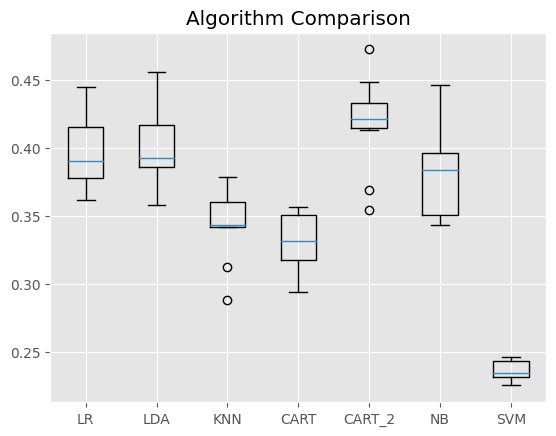

In [272]:
# Compare models
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Based on the CV accuracy scores the algorithm comparison bos plox, we can tell that the random forest has the best performance with the highest accuracy score. These results suggest that the Random Forest may be the most accurate model.

#### 3.3 Visualizing the model results

We want to visualize the random foresst results. Due to the number of features, the tree graph will be large.

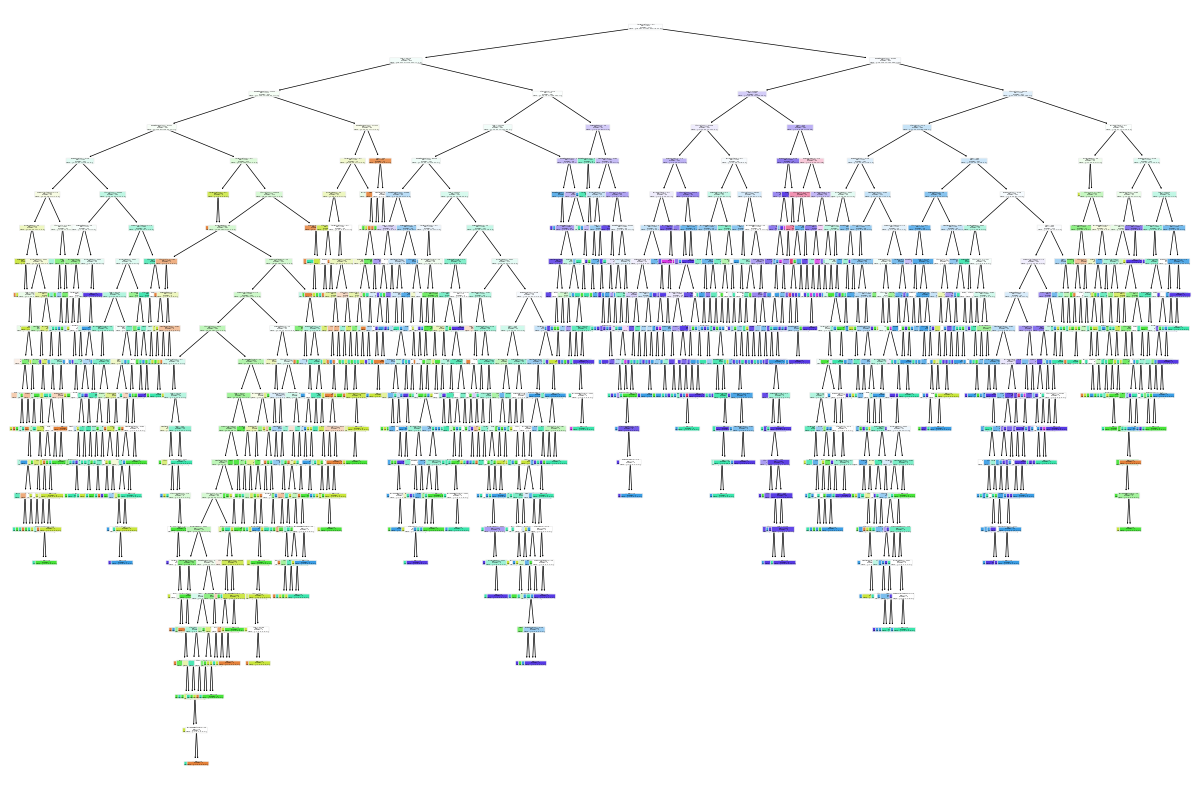

In [273]:
from sklearn.tree import plot_tree

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train.columns,
          filled=True, impurity=True, 
          rounded=True)

plt.show()

#### 3.4 Hyperparameter Tuning

* We want to improve the performance of this random forest by tuning hyperparameter.
* **n_estimators**: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
* **max_depth**: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

*RandomizedSearchCV* will train many models (defined by n_iter_) and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [274]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CA4FC06410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CA33279E10>})

In [275]:
# Create a variable for the best random forest model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 378}


## 4. Predictions and Model Accuracy <a class="anchor" id="forth-bullet"></a>

We fit the model on the entire training dataset and make predictions on the test dataset.

In [276]:
# Generate predictions with the best model
Y_pred = best_rf.predict(X_test)

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

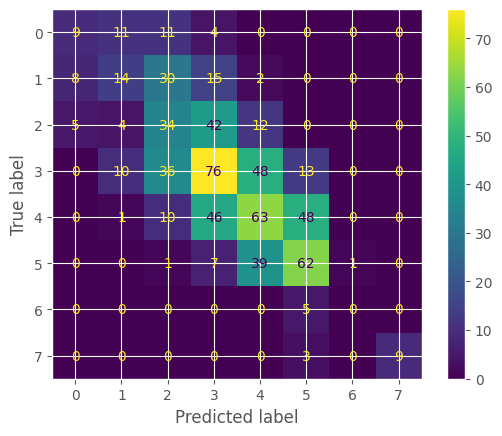

In [277]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

We should also evaluate the best model with accuracy, precision, recall, f1-score, and support.

In [278]:
# Evaluate predictions
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.39322533136966126
              precision    recall  f1-score   support

           1       0.41      0.26      0.32        35
           2       0.35      0.20      0.26        69
           3       0.28      0.35      0.31        97
           4       0.40      0.42      0.41       183
           5       0.38      0.38      0.38       168
           6       0.47      0.56      0.51       110
           7       0.00      0.00      0.00         5
           8       1.00      0.75      0.86        12

    accuracy                           0.39       679
   macro avg       0.41      0.36      0.38       679
weighted avg       0.39      0.39      0.39       679



From the above results, we can see that the accuracy is around 0.41 on the hold out dataset. And the confusion matrix provides an indication of the errors made.

And we want to know which features are the most important using the following codes.

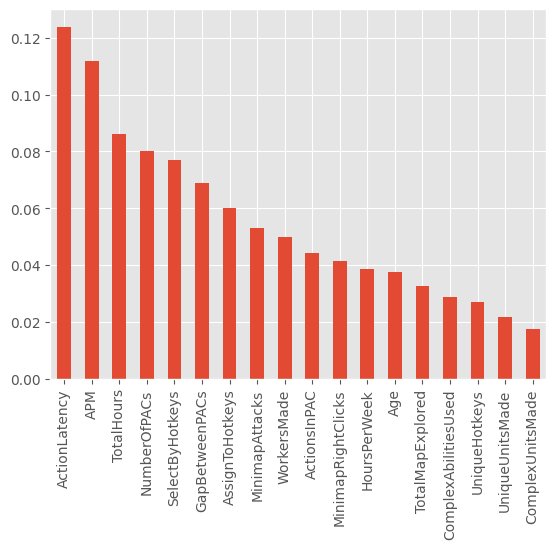

In [279]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## 5. Communication with Non-technical Stakeholders <a class="anchor" id="fifth-bullet"></a>

Summarize the findings of the analysis and model evaluation in a non-technical manner.
Explain the chosen model, its accuracy, and its potential benefits and limitations to the stakeholders.
Visualize the results using appropriate graphs or charts to aid in understanding.

In this project, our goal was to develop a model to predict a player's rank using the information provided in the dataset. 

Here are the key findings:

* Player Ranks Distribution: The dataset consists of players across eight different ranks, ranging from Bronze to Professional. The majority of players fall within the Gold, Platinum, and Diamond ranks, while the higher ranks of Master, GrandMaster, and Professional have fewer representatives.

* Feature Importance: Based on the random forest results, our analysis identified several key factors that strongly influence a player's rank. As we can see from the last graph above, these factors include the player's **Average action latency**, **Actions per minute (APM)**, **Total Hours spent playing**, **Number of PACs**, and **Number of unit or building selections made using hotkeys**. These features contribute significantly to predicting a player's rank and should be considered when evaluating player performance.

Based on these findings, we would like to propose the following recommendations:

* Player Training and Development: Focus on improving APM and reducing Action Latency through training and practice. These factors have a significant impact on a player's rank and can be improved with proper coaching and skill-building exercises.

* Playtime Optimization: Encourage players to balance their Total Hours spent playing with other aspects of life, such as rest, physical activity, and study. Optimal playtime allocation can help maintain performance and prevent burnout.

* Diversify Unit Strategy: Encourage players to experiment with a wider range of Unique Units and increase the number of PACs in a limited time, as it has been shown to correlate with higher ranks. Exploring different strategies and unit compositions can lead to improved gameplay and rank progression.


## 6. Hypothetical: Suggestions for Data Collection <a class="anchor" id="sixth-bullet"></a>

Based on our EDA and model results, we find that there might be few shortages of the current dataset and we would like to give out our suggestions of future data collection:

* Address Class Imbalance: It is important to note that in our current dataset, the distribution of ranks in the dataset is imbalanced, with lower ranks having more representation compared to higher ranks. This imbalance can impact the model's performance and requires careful consideration during evaluation. Our model might be weak in predicting higher ranks. So, it will be better if there will there will be more data of players with high ranks. Also, there are data with outliers, it will be better if the data accuracy can be validated.

* Consider Player Demographics and Background: To gain a comprehensive understanding of player performance, we suggest collecting more demographic information such as gender, and geographic location. This data will enable us to identify any potential correlations between player characteristics and rank progression, as well as investigate regional differences in gameplay strategies.

* Consider Longitudinal Data: Collecting data over an extended period can provide valuable insights into player progression and performance trends. Longitudinal data allows for the analysis of player development, the impact of interventions, and the detection of patterns and changes over time. In other words, by analyzing the time series data, we might notice what influence most in the process of player gaing higher ranks.

* Diversify the Data Pool: Include game playing data of other similiar games into our dataset for players are usually good at the same type of games. As StarCraft is Real-time Strategy game, we might gain more insights by investigating players' performance of Real-time Strategy games. 

* Collect Player Feedback and Experience: Consider gathering qualitative data through player feedback surveys or interviews. This information can shed light on player experiences, motivations, and challenges they face during gameplay. The insights gained from player perspectives will enrich our understanding of performance factors beyond quantitative metrics alone.

* Collect Player Behavior and Engagement: Explore the collection of data on player behavior and engagement, such as playtime patterns, frequency of logins, or participation in tournaments or competitions. This information can provide insights into player dedication, commitment, and the relationship between player activity and rank progression.

* Collect Top Player's Performance Data: If possible, we could collect data of the game performance data from the top StarCrafy players (e.g., Li "Oliveira" Peinan, who won the Intel Extreme Masters Katowice 2023). We might be able to find out more features related to the rank.